In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv("Netflea_Dataset.csv")

In [2]:
data.shape

(86900, 4)

In [3]:
data.sample(10)

,Type,Brand,Colour,ImgName
10359,Summer dress,NaN,Green,https://www.netflea.com/media/catalog/product/...
32927,Cardigan,NaN,Black,https://www.netflea.com/media/catalog/product/...
69698,Knitting,Bel,Gray,https://www.netflea.com/media/catalog/product/...
46278,Maternity jeans,NaN,Gray,https://www.netflea.com/media/catalog/product/...
30115,NaN,Kappahl,NaN,https://www.netflea.com/media/catalog/product/...
77455,Winter hat,NaN,NaN,https://www.netflea.com/media/catalog/product/...
38185,Shirt,NaN,NaN,https://www.netflea.com/media/catalog/product/...
75124,No,Across,No,https://www.netflea.com/media/catalog/product/...
41414,Jeans,Lindex,NaN,https://www.netflea.com/media/catalog/product/...
62621,T-shirt,Other Brand,Light,https://www.netflea.com/media/catalog/product/...


In [4]:
data.isna().sum()

Type        5379
Brand      13011
Colour     22529
ImgName      245
dtype: int64

In [5]:
data[data['ImgName'].isna()]

,Type,Brand,Colour,ImgName
31513,Cardigan,Vero Moda,Light beige,NaN
32324,NaN,NaN,NaN,NaN
32325,NaN,NaN,NaN,NaN
51707,Skirt,H&M,Black,NaN
60433,Pants,Bula,Dark blue,NaN
76161,NaN,NaN,NaN,NaN
76162,NaN,NaN,NaN,NaN
76171,NaN,NaN,NaN,NaN
76172,NaN,NaN,NaN,NaN
76173,NaN,NaN,NaN,NaN


In [6]:
data = data.dropna(thresh=1)
print("Data shape: ", data.shape)
data.isna().sum()

Data shape:  (86658, 4)


Type        5137
Brand      12769
Colour     22287
ImgName        3
dtype: int64

In [7]:
data = data[data['ImgName'].notna()]
data.isna().sum()

Type        5137
Brand      12769
Colour     22287
ImgName        0
dtype: int64

In [8]:
dataSample = data.sample(1)
sampleIndex = dataSample.index.values.astype(int)[0]

print("Sample row to check: ", sampleIndex)

print("Sample ImgName column before: " + data.ImgName.iloc[sampleIndex])

data.ImgName = data.ImgName.map(lambda x: x.split("/")[-1])

print("Sample ImgName column after: " + data.ImgName.iloc[sampleIndex])

Sample row to check:  48123
Sample ImgName column before: https://www.netflea.com/media/catalog/product/cache/2/image/750x750/9df78eab33525d08d6e5fb8d27136e95/2/0/20190922_1731241569177065.jpg
Sample ImgName column after: 20190922_1731241569177065.jpg


In [9]:
data[data['Type'].isna()]

,Type,Brand,Colour,ImgName
38,NaN,Vila,NaN,154676351414559014199365749100451546763643.jpg
39,NaN,Gina Tricot,NaN,154619896617528080607222277029941546199047.jpg
40,NaN,Object,NaN,154619545588356752573569752217661546195637.jpg
679,NaN,Other Brand,NaN,vvvvvvvvvvv0041544208382.JPG
1287,NaN,Other Brand,NaN,DSC006731544459189.JPG
7179,NaN,Mexx,NaN,DSC080991542482688.JPG
7588,NaN,JSFN,NaN,DSC_03231487191482.JPG
7589,NaN,Kappahl,NaN,DSC_00561487275815.JPG
7598,NaN,Adidas,NaN,688F6C39-348D-47BB-978F-B73FDCAAE21D1540849747...
7611,NaN,-,NaN,image1535008456.jpg


In [10]:
with pd.option_context('display.max_rows', 5137):
    print(data[data['Type'].isna()])

      Type                Brand Colour  \
38     NaN                 Vila    NaN   
39     NaN          Gina Tricot    NaN   
40     NaN               Object    NaN   
679    NaN          Other Brand    NaN   
1287   NaN          Other Brand    NaN   
7179   NaN                 Mexx    NaN   
7588   NaN                 JSFN    NaN   
7589   NaN              Kappahl    NaN   
7598   NaN               Adidas    NaN   
7611   NaN                    -    NaN   
7612   NaN        Sisters Point    NaN   
7613   NaN              Seppälä    NaN   
7614   NaN          Gina Tricot    NaN   
8706   NaN          Other Brand    NaN   
8707   NaN                 Avia    NaN   
8717   NaN          Other Brand    NaN   
8724   NaN                 Vila    NaN   
9877   NaN          Other Brand    NaN   
9878   NaN             Benetton    NaN   
11899  NaN          Other Brand    NaN   
11901  NaN          Other Brand    NaN   
12913  NaN          Other Brand    NaN   
12914  NaN          Other Brand   

In [11]:
data = data[data['Type'].notna()]
print("Data shape: ", data.shape)
data.isna().sum()

Data shape:  (81518, 4)


Type           0
Brand      12769
Colour     17150
ImgName        0
dtype: int64

In [12]:
data.Type.describe()

count     81518
unique     1014
top       Shirt
freq       5209
Name: Type, dtype: object

In [13]:
data.Type.value_counts()

Shirt                      5209
T-shirt                    4063
Jeans                      3787
Dress                      3426
Sweater                    2739
Top                        2712
Cardigan                   2672
Pants                      2578
Knitting                   2076
Sweatshirt                 1743
Collar shirt               1706
Skirt                      1503
Shorts                     1244
Long-sleeved shirt         1074
Jacket                     1065
Tunic                      1054
College shirt              1014
Party dress                 979
Body                        770
Coat                        757
Quilted jacket              709
Shirt blouse                518
Straight pants              510
Beanie                      504
Bra                         495
Leggings                    489
Knitted dress               489
College pants               465
Shirt set                   442
Sport shirt                 434
                           ... 
Silk pan

In [14]:
typeDict = (data.Type.value_counts()).to_dict()
dropList = []

for key, val in typeDict.items():
    if val < 50:
        dropList.append(key)

data = data[~data.Type.isin(dropList)]
data.Type.describe()

count     72743
unique      224
top       Shirt
freq       5209
Name: Type, dtype: object

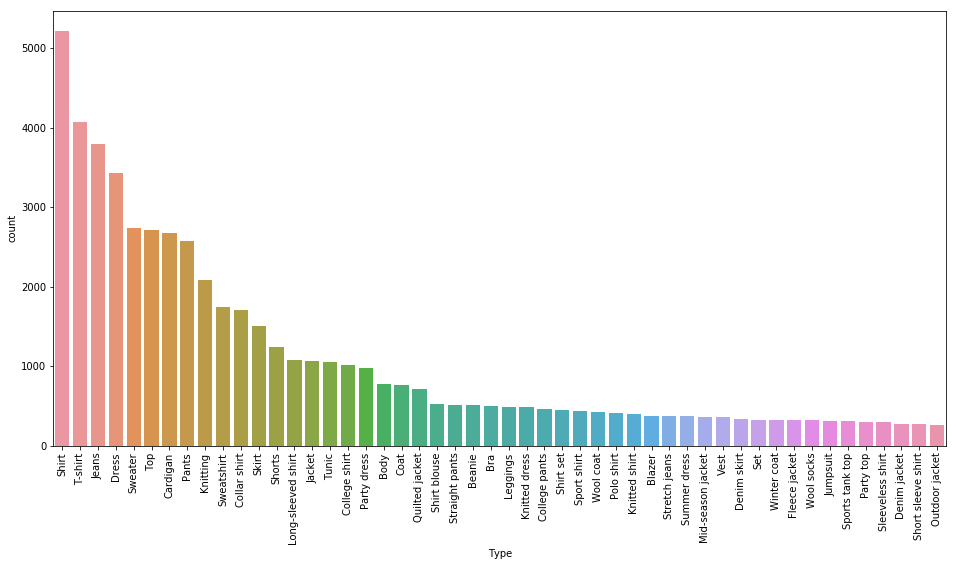

In [15]:
plt.figure(figsize=(16,8))

TypeChart = sns.countplot(
    data=data,
    x='Type',
    order=data.Type.value_counts().iloc[:50].index
)


TypeChart.set_xticklabels(TypeChart.get_xticklabels(), rotation=90)
plt.show()

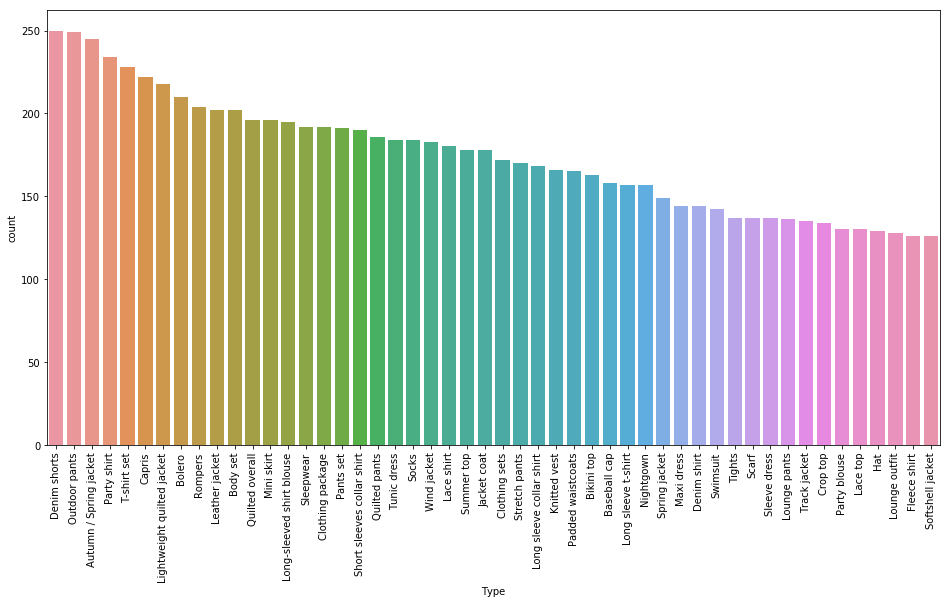

In [16]:
plt.figure(figsize=(16,8))

TypeChart = sns.countplot(
    data=data,
    x='Type',
    order=data.Type.value_counts().iloc[50:100].index
)


TypeChart.set_xticklabels(TypeChart.get_xticklabels(), rotation=90)
plt.show()

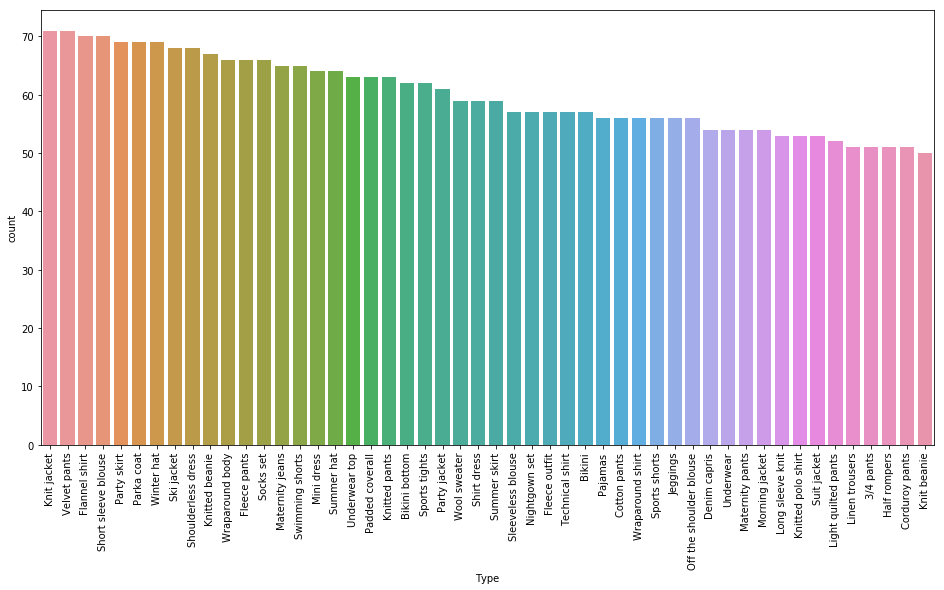

In [17]:
plt.figure(figsize=(16,8))

TypeChart = sns.countplot(
    data=data,
    x='Type',
    order=data.Type.value_counts().iloc[-50:].index
)


TypeChart.set_xticklabels(TypeChart.get_xticklabels(), rotation=90)
plt.show()

In [18]:
data.Brand.describe()

count     61416
unique     1656
top         H&M
freq       9301
Name: Brand, dtype: object

In [19]:
data.Brand.value_counts()

H&M                      9301
Other Brand              4399
Lindex                   1900
Vero Moda                1623
Esprit                   1306
Gina Tricot              1258
Kappahl                  1149
Only                     1021
Vila                      806
Zara                      734
Cubus                     666
-                         664
Ciraf                     633
Seppälä                   614
EI MERKKIÄ                594
Name it                   523
Ellos                     493
BikBok                    464
Esmara                    428
Mango                     377
Amisu                     376
Link                      363
House                     360
Polarn O Pyret            360
Jack & Jones              348
Disney                    330
Unknown brand             327
Me&I                      321
Nike                      304
Reima                     291
                         ... 
Lamoura                     1
Sankar                      1
Phink Indu

In [20]:
data.Brand.fillna("Unknown", inplace=True)
print(data.Brand.describe())
data.isna().sum()

count       72743
unique       1657
top       Unknown
freq        11327
Name: Brand, dtype: object


Type           0
Brand          0
Colour     15693
ImgName        0
dtype: int64

In [21]:
unknownBrandList = ["Other Brand", "-", "Unknown brand", "Self-made", 
                    "Brand not available", "Various brands", "Sloggi", "Handmade"]

for item in unknownBrandList:
    rowIDs = data[data.Brand.str.contains(item, na=False, flags=re.IGNORECASE)].index.values
    data.loc[rowIDs, 'Brand'] = "Unknown"

In [22]:
brandListBefore = ["Seppälä", "H&M", "Lindex", "Kappahl", "Zara", "Ellos", 
                   "ReimaTec", "Benetton", "Reflex", "Premoda", "Dressman", 
                   "Hilfiger", "Crivit", "Fransa", "Bull & Bear", "Inspire", 
                   "Gap", "LOGG", "M&S Collection"]

brandListAfter = ["Seppälä", "H&M", "Lindex", "Kappahl", "Zara", "Ellos", 
                  "ReimaTec", "Benetton", "Reflex", "Premoda", "Dressmann", 
                  "Tommy Hilfiger", "Crivit", "Fransa", "Pull & Bear", 
                  "Inspire", "Gap", "L.O.G.G.", "Marks & Spencer"]

for index, item in enumerate(brandListBefore):
    rowIDs = data[data.Brand.str.contains(item, na=False, flags=re.IGNORECASE)].index.values
    data.loc[rowIDs, 'Brand'] = brandListAfter[index]

In [23]:
brandDict = (data.Brand.value_counts()).to_dict()

for key, val in brandDict.items():
    if val < 50:
        data['Brand'] = data['Brand'].replace( \
            to_replace = key, value = "Unknown")

print(data.Brand.describe())
data.isna().sum()

count       72743
unique        168
top       Unknown
freq        29872
Name: Brand, dtype: object


Type           0
Brand          0
Colour     15693
ImgName        0
dtype: int64

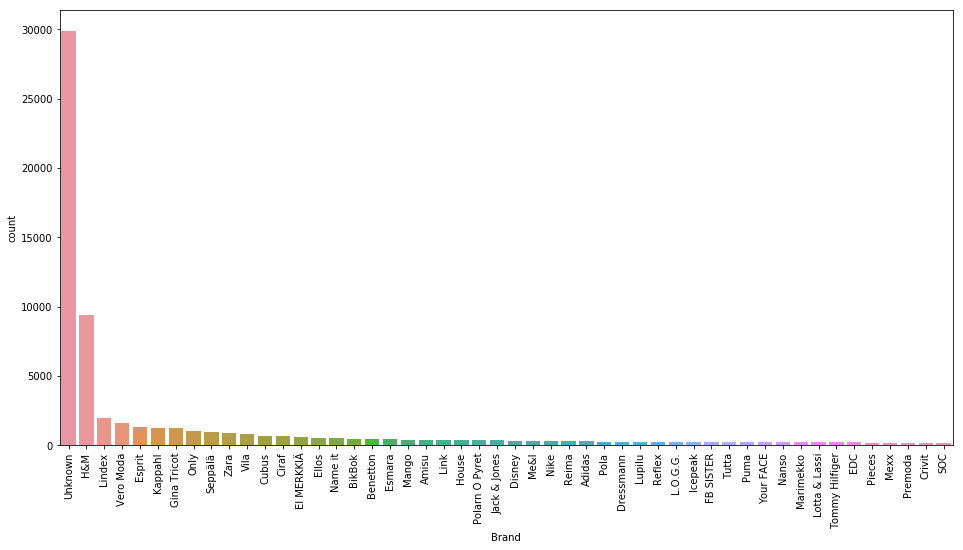

In [24]:
plt.figure(figsize=(16,8))

TypeChart = sns.countplot(
    data=data,
    x='Brand',
    order=data.Brand.value_counts().iloc[:50].index
)


TypeChart.set_xticklabels(TypeChart.get_xticklabels(), rotation=90)
plt.show()

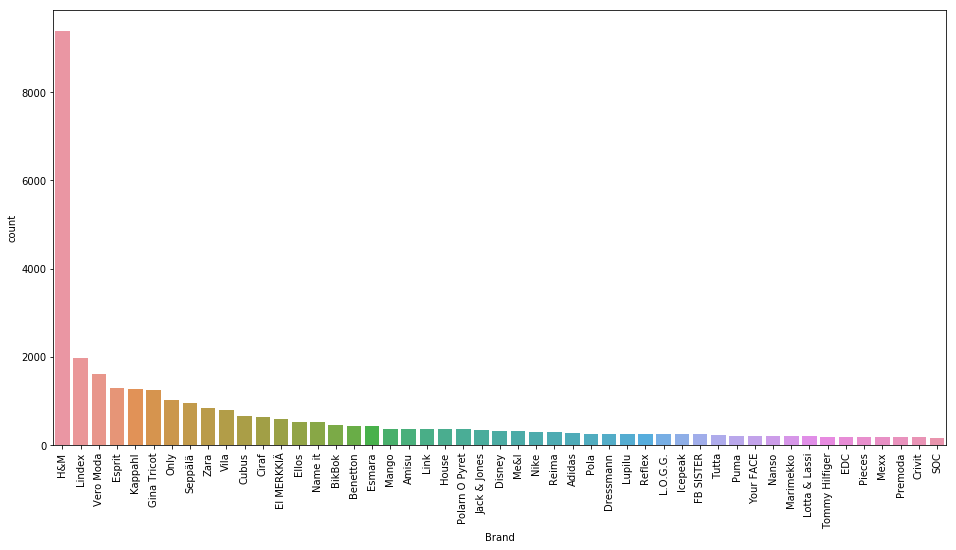

In [25]:
plt.figure(figsize=(16,8))

TypeChart = sns.countplot(
    data=data,
    x='Brand',
    order=data.Brand.value_counts().iloc[1:50].index
)


TypeChart.set_xticklabels(TypeChart.get_xticklabels(), rotation=90)
plt.show()

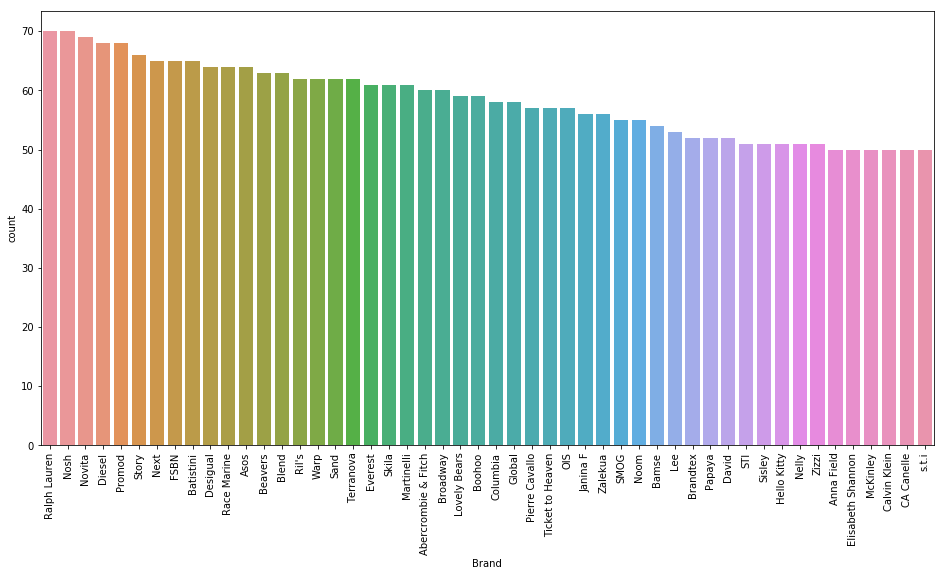

In [26]:
plt.figure(figsize=(16,8))

TypeChart = sns.countplot(
    data=data,
    x='Brand',
    order=data.Brand.value_counts().iloc[-50:].index
)


TypeChart.set_xticklabels(TypeChart.get_xticklabels(), rotation=90)
plt.show()

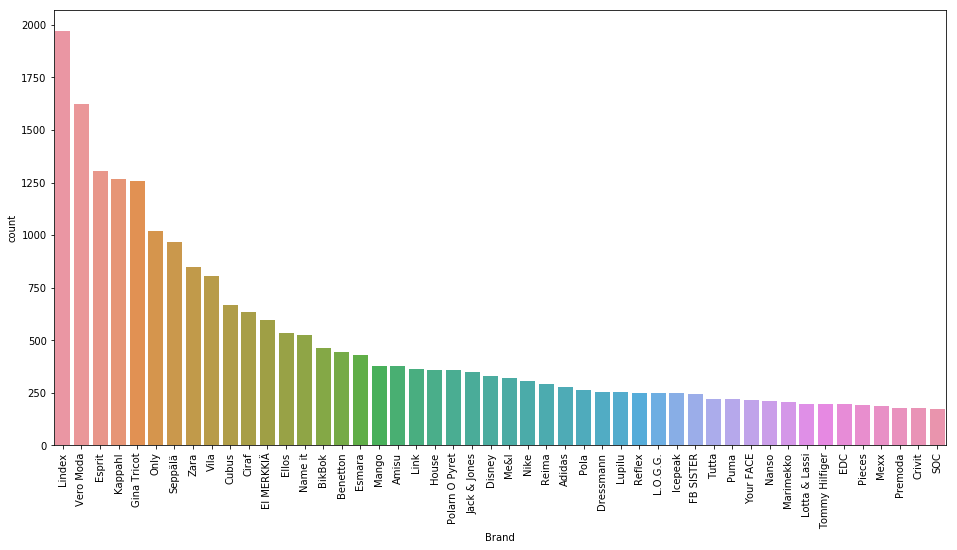

In [27]:
plt.figure(figsize=(16,8))

TypeChart = sns.countplot(
    data=data,
    x='Brand',
    order=data.Brand.value_counts().iloc[2:50].index
)


TypeChart.set_xticklabels(TypeChart.get_xticklabels(), rotation=90)
plt.show()

In [28]:
data.Colour.describe()

count     57050
unique      156
top       Black
freq      13142
Name: Colour, dtype: object

In [29]:
data.Colour.value_counts()

Black              13142
Blue                4374
Gray                4308
White               3175
Dark blue           3104
Pink                2523
Red                 2004
Brown               1526
Beige               1519
Multicolored        1447
Denim blue          1323
Black and white     1214
Green               1209
Light blue          1058
Dark gray            875
Natural white        666
Lilac                613
Orange               489
Purple               467
Turquoise            467
Striped              466
Variegated           444
Light pink           423
Yellow               422
Light beige          405
Wine red color       403
Light                399
Light Grey           394
Checkered            340
Flowered             321
                   ...  
Print pattern          7
Rose gold              7
Neon                   7
Terracotta             7
Melange                7
Coffee                 6
Clear                  6
Off                    6
Champagne              5


In [30]:
data.Colour.fillna("Unknown", inplace=True)

data['Colour'] = data['Colour'].replace( \
            to_replace = "No", value = "Unknown")

colourDict = (data.Colour.value_counts()).to_dict()

for key, val in colourDict.items():
    if val < 50:
        data['Colour'] = data['Colour'].replace( \
            to_replace = key, value = "Unknown")

data.Colour.describe()

count       72743
unique         78
top       Unknown
freq        17058
Name: Colour, dtype: object

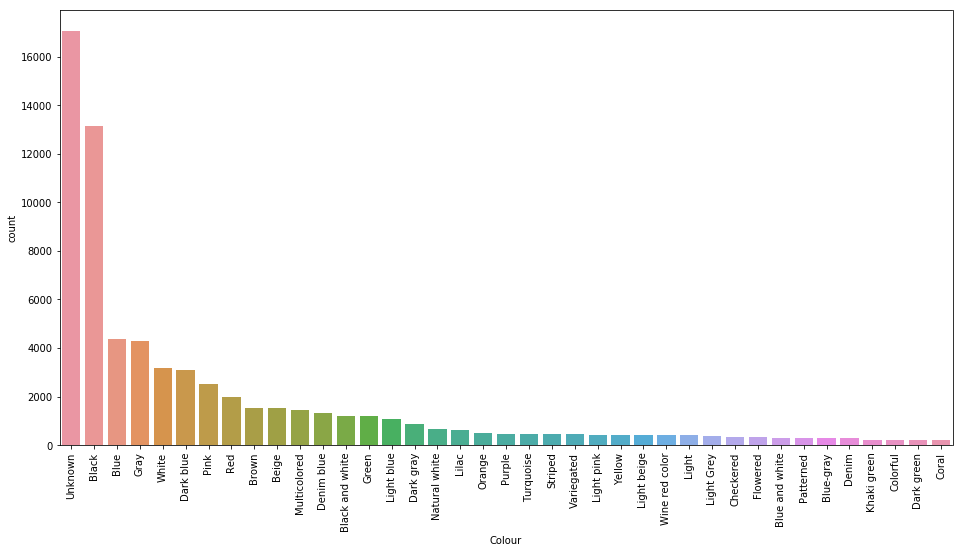

In [31]:
plt.figure(figsize=(16,8))

TypeChart = sns.countplot(
    data=data,
    x='Colour',
    order=data.Colour.value_counts().iloc[:39].index
)


TypeChart.set_xticklabels(TypeChart.get_xticklabels(), rotation=90)
plt.show()

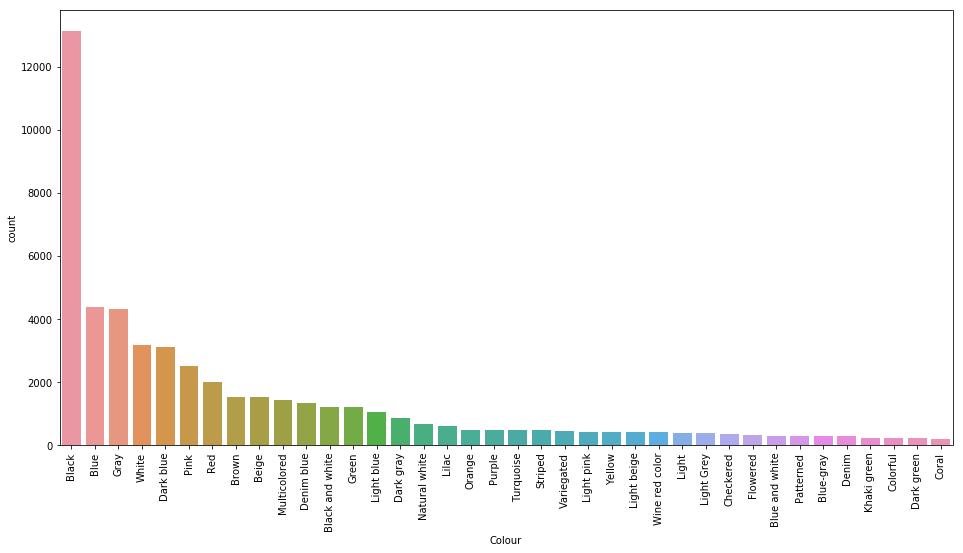

In [32]:
plt.figure(figsize=(16,8))

TypeChart = sns.countplot(
    data=data,
    x='Colour',
    order=data.Colour.value_counts().iloc[1:39].index
)


TypeChart.set_xticklabels(TypeChart.get_xticklabels(), rotation=90)
plt.show()

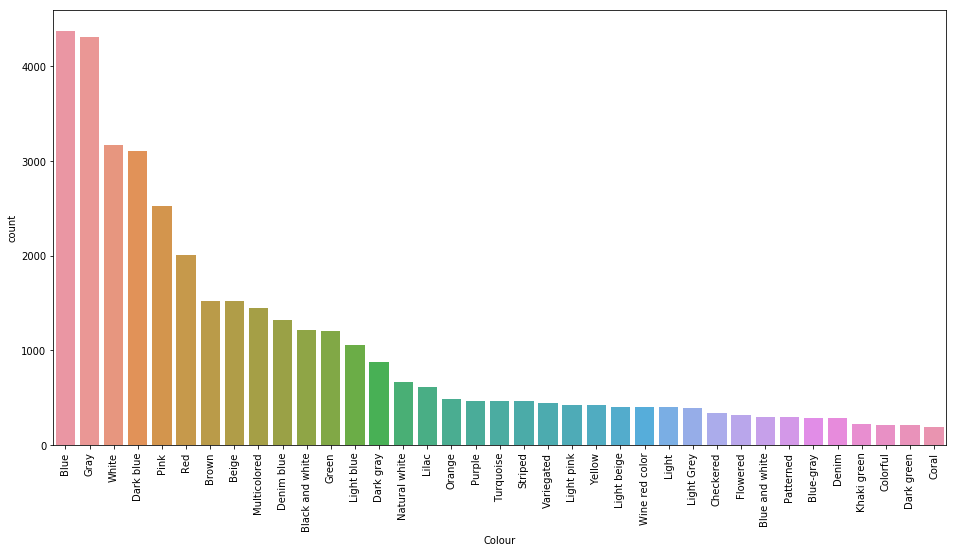

In [33]:
plt.figure(figsize=(16,8))

TypeChart = sns.countplot(
    data=data,
    x='Colour',
    order=data.Colour.value_counts().iloc[2:39].index
)


TypeChart.set_xticklabels(TypeChart.get_xticklabels(), rotation=90)
plt.show()

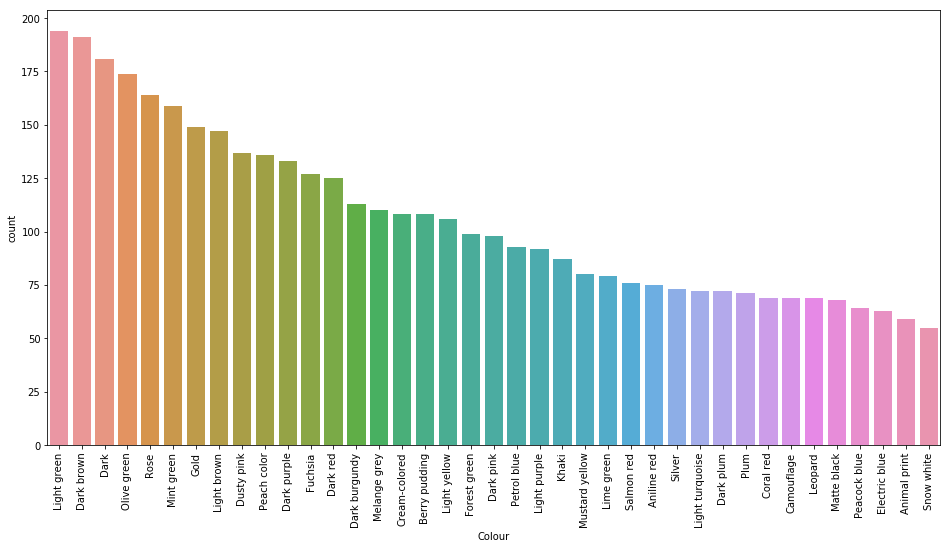

In [34]:
plt.figure(figsize=(16,8))

TypeChart = sns.countplot(
    data=data,
    x='Colour',
    order=data.Colour.value_counts().iloc[-39:].index
)


TypeChart.set_xticklabels(TypeChart.get_xticklabels(), rotation=90)
plt.show()

In [35]:
counts = data.Colour.value_counts().to_frame()
with pd.option_context('display.max_rows', 1700):
    print (counts)

                 Colour
Unknown           17058
Black             13142
Blue               4374
Gray               4308
White              3175
Dark blue          3104
Pink               2523
Red                2004
Brown              1526
Beige              1519
Multicolored       1447
Denim blue         1323
Black and white    1214
Green              1209
Light blue         1058
Dark gray           875
Natural white       666
Lilac               613
Orange              489
Purple              467
Turquoise           467
Striped             466
Variegated          444
Light pink          423
Yellow              422
Light beige         405
Wine red color      403
Light               399
Light Grey          394
Checkered           340
Flowered            321
Blue and white      301
Patterned           297
Blue-gray           292
Denim               284
Khaki green         220
Colorful            217
Dark green          215
Coral               194
Light green         194
Dark brown      

In [36]:
data.describe()

,Type,Brand,Colour,ImgName
count,72743,72743,72743,72743
unique,224,168,78,72070
top,Shirt,Unknown,Unknown,image1563968316.jpg
freq,5209,29872,17058,3


In [37]:
data.to_csv(r'NetfleaFinal.csv')

In [38]:
data.Type.value_counts()

Shirt                      5209
T-shirt                    4063
Jeans                      3787
Dress                      3426
Sweater                    2739
Top                        2712
Cardigan                   2672
Pants                      2578
Knitting                   2076
Sweatshirt                 1743
Collar shirt               1706
Skirt                      1503
Shorts                     1244
Long-sleeved shirt         1074
Jacket                     1065
Tunic                      1054
College shirt              1014
Party dress                 979
Body                        770
Coat                        757
Quilted jacket              709
Shirt blouse                518
Straight pants              510
Beanie                      504
Bra                         495
Leggings                    489
Knitted dress               489
College pants               465
Shirt set                   442
Sport shirt                 434
                           ... 
Bikini b

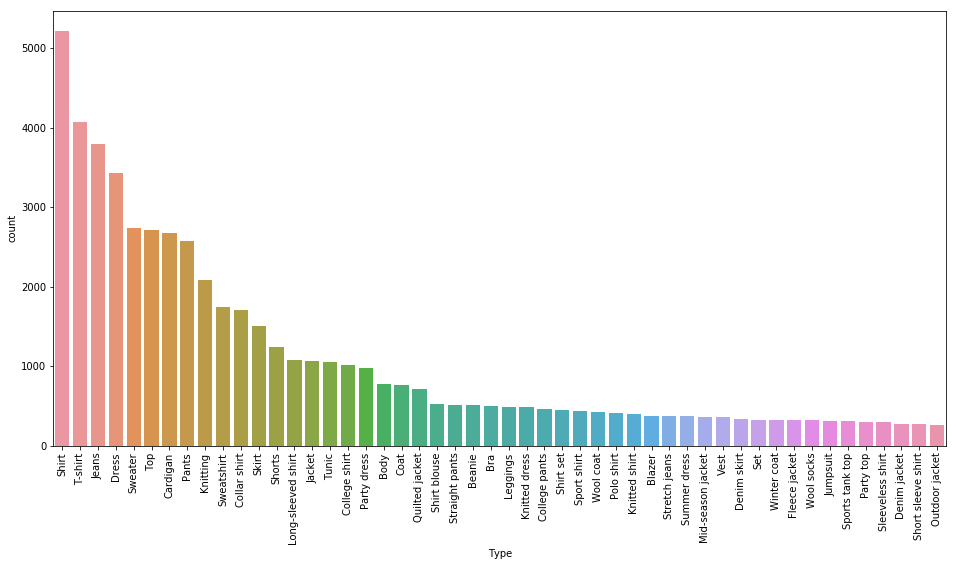

In [39]:
plt.figure(figsize=(16,8))

TypeChart = sns.countplot(
    data=data,
    x='Type',
    order=data.Type.value_counts().iloc[:50].index
)


TypeChart.set_xticklabels(TypeChart.get_xticklabels(), rotation=90)
plt.show()

In [40]:
data.Brand.value_counts()

Unknown                29872
H&M                     9386
Lindex                  1971
Vero Moda               1623
Esprit                  1306
Kappahl                 1265
Gina Tricot             1258
Only                    1021
Seppälä                  966
Zara                     848
Vila                     806
Cubus                    666
Ciraf                    633
EI MERKKIÄ               594
Ellos                    535
Name it                  523
BikBok                   464
Benetton                 443
Esmara                   428
Mango                    377
Amisu                    376
Link                     363
House                    360
Polarn O Pyret           360
Jack & Jones             348
Disney                   330
Me&I                     321
Nike                     304
Reima                    291
Adidas                   278
                       ...  
Martinelli                61
Abercrombie & Fitch       60
Broadway                  60
Lovely Bears  

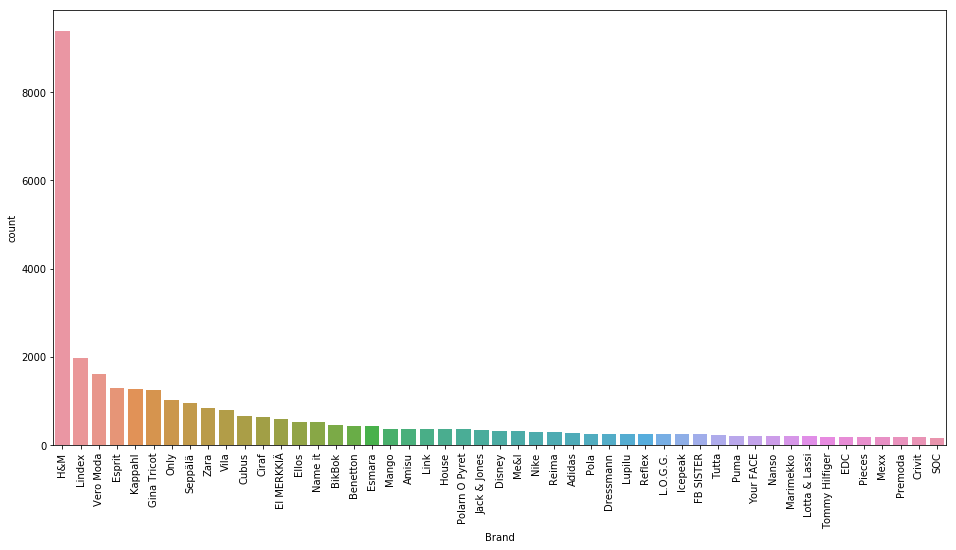

In [41]:
plt.figure(figsize=(16,8))

BrandChart = sns.countplot(
    data=data,
    x='Brand',
    order=data.Brand.value_counts().iloc[1:50].index
)


BrandChart.set_xticklabels(BrandChart.get_xticklabels(), rotation=90)
plt.show()

In [42]:
data.Colour.value_counts()

Unknown            17058
Black              13142
Blue                4374
Gray                4308
White               3175
Dark blue           3104
Pink                2523
Red                 2004
Brown               1526
Beige               1519
Multicolored        1447
Denim blue          1323
Black and white     1214
Green               1209
Light blue          1058
Dark gray            875
Natural white        666
Lilac                613
Orange               489
Purple               467
Turquoise            467
Striped              466
Variegated           444
Light pink           423
Yellow               422
Light beige          405
Wine red color       403
Light                399
Light Grey           394
Checkered            340
                   ...  
Peach color          136
Dark purple          133
Fuchsia              127
Dark red             125
Dark burgundy        113
Melange grey         110
Cream-colored        108
Berry pudding        108
Light yellow         106


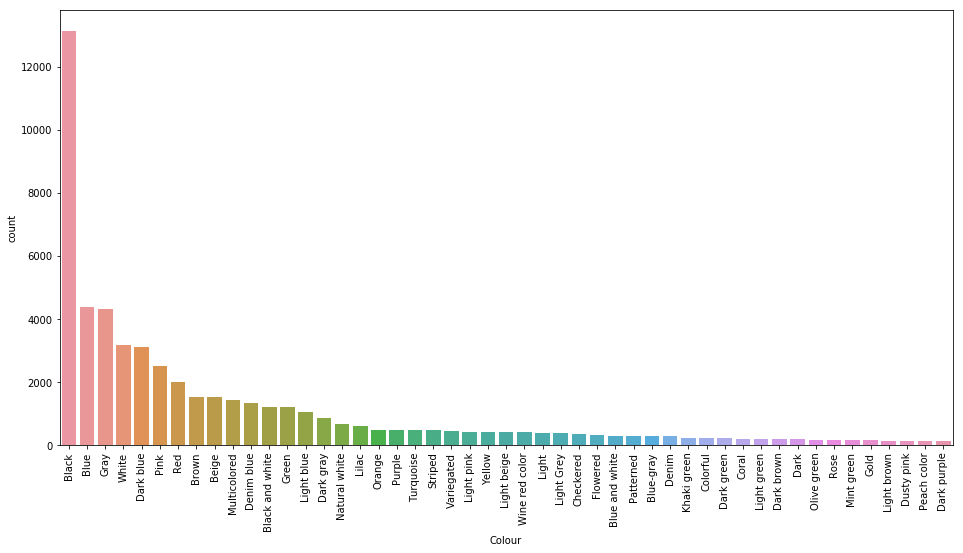

In [43]:
plt.figure(figsize=(16,8))

ColourChart = sns.countplot(
    data=data,
    x='Colour',
    order=data.Colour.value_counts().iloc[1:50].index
)


ColourChart.set_xticklabels(ColourChart.get_xticklabels(), rotation=90)
plt.show()

In [44]:
data = data.drop_duplicates()
data.describe()

,Type,Brand,Colour,ImgName
count,72070,72070,72070,72070
unique,224,168,78,72070
top,Shirt,Unknown,Unknown,IMG_20191014_1154061571054247.jpg
freq,5151,29613,16943,1


In [45]:
imagesList = [line.rstrip('\n') for line in open("imagesList.txt")]
print("Total images in list: ", len(imagesList))

Total images in list:  72066


In [46]:
before = data.ImgName.unique()
beforeLen = len(before)
print("Number of unique values in 'ImgName' before: ", beforeLen)

data = data[data.ImgName.isin(imagesList)]

after = data.ImgName.unique()
afterLen = len(after)
print("Number of unique values in 'ImgName' after: ", afterLen)

difference = beforeLen - afterLen
print("Difference is: ", difference)

Number of unique values in 'ImgName' before:  72070
Number of unique values in 'ImgName' after:  72066
Difference is:  4


In [47]:
data.Type.value_counts()

Shirt                      5151
T-shirt                    4020
Jeans                      3766
Dress                      3391
Sweater                    2723
Top                        2697
Cardigan                   2660
Pants                      2547
Knitting                   2074
Sweatshirt                 1729
Collar shirt               1698
Skirt                      1490
Shorts                     1229
Jacket                     1062
Long-sleeved shirt         1048
Tunic                      1045
College shirt              1001
Party dress                 966
Coat                        750
Body                        737
Quilted jacket              700
Shirt blouse                518
Straight pants              508
Beanie                      496
Bra                         492
Knitted dress               487
Leggings                    484
College pants               458
Shirt set                   433
Sport shirt                 426
                           ... 
Padded c

In [48]:
typeDict = (data.Type.value_counts()).to_dict()
dropList = []

for key, val in typeDict.items():
    if val < 50:
        dropList.append(key)

data = data[~data.Type.isin(dropList)]
data.Type.describe()

count     71872
unique      220
top       Shirt
freq       5151
Name: Type, dtype: object

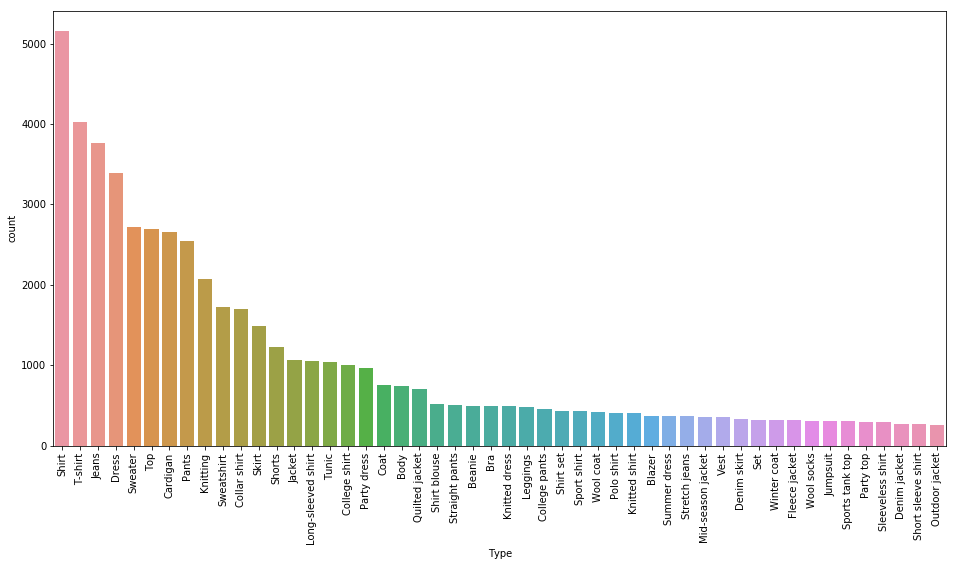

In [49]:
plt.figure(figsize=(16,8))

TypeChart = sns.countplot(
    data=data,
    x='Type',
    order=data.Type.value_counts().iloc[:50].index
)


TypeChart.set_xticklabels(TypeChart.get_xticklabels(), rotation=90)
plt.show()

In [50]:
data.Brand.value_counts()

Unknown              29543
H&M                   9268
Lindex                1939
Vero Moda             1614
Esprit                1297
Gina Tricot           1255
Kappahl               1239
Only                  1015
Seppälä                954
Zara                   844
Vila                   803
Cubus                  661
Ciraf                  614
EI MERKKIÄ             578
Ellos                  531
Name it                501
BikBok                 463
Benetton               432
Esmara                 424
Amisu                  375
Mango                  374
Link                   363
House                  354
Polarn O Pyret         349
Jack & Jones           347
Disney                 326
Me&I                   316
Nike                   302
Reima                  282
Adidas                 274
                     ...  
Martinelli              59
Beavers                 59
Broadway                59
Boohoo                  59
Columbia                58
Global                  58
P

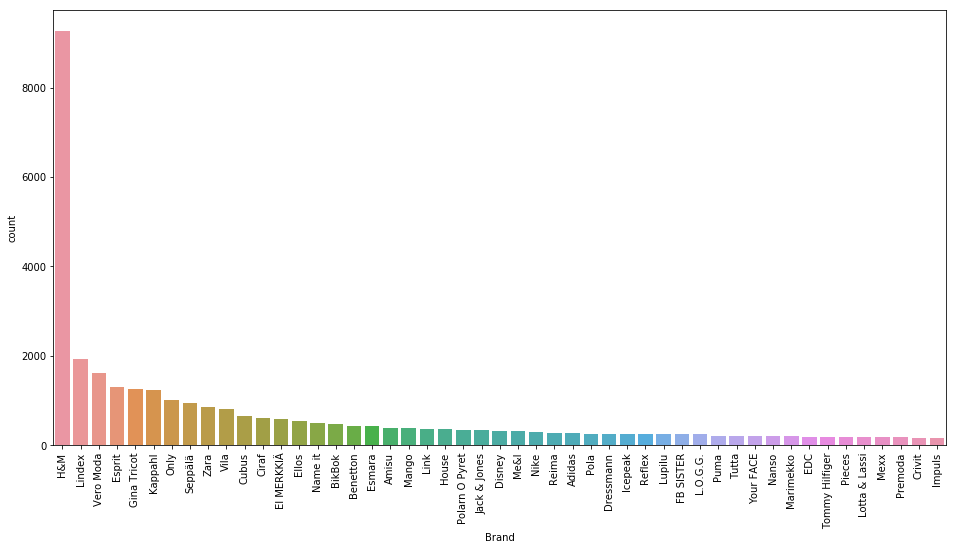

In [51]:
plt.figure(figsize=(16,8))

BrandChart = sns.countplot(
    data=data,
    x='Brand',
    order=data.Brand.value_counts().iloc[1:50].index
)


BrandChart.set_xticklabels(BrandChart.get_xticklabels(), rotation=90)
plt.show()

In [52]:
data.Colour.value_counts()

Unknown            16898
Black              13028
Blue                4296
Gray                4247
White               3129
Dark blue           3066
Pink                2471
Red                 1975
Beige               1505
Brown               1491
Multicolored        1425
Denim blue          1307
Black and white     1205
Green               1187
Light blue          1032
Dark gray            868
Natural white        662
Lilac                608
Orange               485
Turquoise            462
Striped              459
Purple               454
Variegated           441
Light pink           419
Yellow               411
Light beige          402
Wine red color       398
Light                394
Light Grey           389
Checkered            339
                   ...  
Peach color          135
Dark purple          131
Dark red             125
Fuchsia              124
Dark burgundy        113
Melange grey         110
Cream-colored        108
Berry pudding        107
Light yellow         103


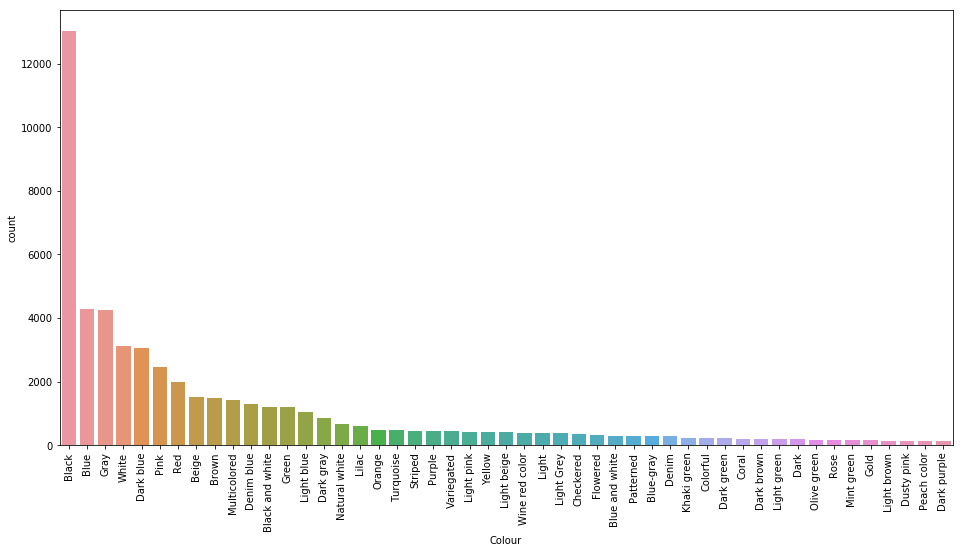

In [53]:
plt.figure(figsize=(16,8))

ColourChart = sns.countplot(
    data=data,
    x='Colour',
    order=data.Colour.value_counts().iloc[1:50].index
)


ColourChart.set_xticklabels(ColourChart.get_xticklabels(), rotation=90)
plt.show()

In [54]:
data.to_csv(r'NetfleaReady.csv')